1. Найти в интернете любую выборку объёма не менее 100 наблюдений, если вы будете делать
программу для её обработки, не менее 20 наблюдений, если вы будете считать вручную.
Напоминаю, что выборка – это серия независимых наблюдений одного и того же показателя
(например, плотности населения для всех ~200 стран мира, зарплата 150 наугад выбранных
людей, площади 200 наугад выбранных квартир с сайта с объявлениями по продаже
недвижимости и т.п.).
2. По этой выборке (желательно программно, а не ручками):
2.1. вычислить выборочное среднее, выборочную дисперсию, выборочную квантиль (по
заданному пользователем уровню квантили).
2.2. построить графики выборочной функции распределения, гистограммы и/или ядерной
оценки плотности вероятности.
2.3. в предположении, что наблюдения имеют нормальное распределение, построить
односторонние и двусторонние доверительные интервалы надёжности 0,9 и 0,95 для
математического ожидания и дисперсии.

In [36]:
import numpy as np 
import pandas as pd 
import scipy.stats


df = pd.read_csv("/kaggle/input/movies-meta-data/movie_metadata.csv")

#Возьмем датасет фильмов, выберем из него случайне 100 фильмов 2000года выпуска и их бюджет

df = df[df['title_year']==2000]['budget'].reset_index(drop=True).dropna().sample(100)

In [37]:
print('Среднее: ',df.mean())
print('Стандартное отколнение: ',df.std())
print('Дисперсия: ',df.std()**2)

Среднее:  36643250.0
Стандартное отколнение:  34050322.766347185
Дисперсия:  1159424480492421.5


In [38]:
df.describe()

count    1.000000e+02
mean     3.664325e+07
std      3.405032e+07
min      2.250000e+05
25%      1.075000e+07
50%      2.400000e+07
75%      5.625000e+07
max      1.400000e+08
Name: budget, dtype: float64

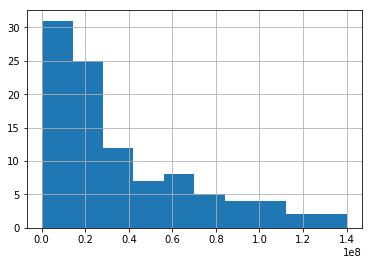

In [39]:
df.hist()
#не нормальное распределение

In [42]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

#среднее, нижний доверительный интерва, верхний доверительный интервал

print('Доверительные интервалы для среднего 0.95, ',mean_confidence_interval(np.array(df),0.95))
#от 29 до 43 млн долларов
print('Доверительные интервалы для среднего 0.90, ',mean_confidence_interval(np.array(df),0.90))


Доверительные интервалы для среднего 0.95,  (36643250.0, 29886927.236267183, 43399572.76373282)
Доверительные интервалы для среднего 0.90,  (36643250.0, 30989564.521993455, 42296935.47800654)


In [44]:
def std_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.std(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print('Доверительные интервалы для стандартного отклонения 0.95, ',std_confidence_interval(np.array(df),0.95))
#от 27 до 40млн долларов со средним отколнением 33 млн
print('Доверительные интервалы для стандартного отклонения 0.90, ',std_confidence_interval(np.array(df),0.90))
#от 28 до 39 млн долларов со средним 33 млн

Доверительные интервалы для стандартного отклонения 0.95,  (33879643.38194102, 27123320.618208203, 40635966.14567384)
Доверительные интервалы для стандартного отклонения 0.90,  (33879643.38194102, 28225957.903934475, 39533328.85994756)
